# Linear Programming Python Implementation

### Linear Programming, also sometimes called linear optimisation, involves maximising or minimising a linear objective function, subject to a set of linear inequality or equality constraints.

Examples of problems that can be solved by linear programming include:

   * Scheduling – Rota or Factory scheduling to meet production/workload demands at lowest cost
   * Resourcing Problems – How best to allocate resources to maximise profits
   * Diet /Blending Problems – Cost effectively blending a mixture of components
   * Sudoku



* Cash Flow / Captial Budget
* Transportation / Distribution
* Assignment
* Partitioning Problem
* Set Covering


  *  SciPy is a general-purpose package for scientific computing with Python.
  Its subpackage scipy.optimize can be used for both linear and nonlinear optimization.
  *  PuLP is a Python linear programming API for defining problems and invoking external solvers.


## Blending Problem


https://coin-or.github.io/pulp/CaseStudies/a_blending_problem.html

http://benalexkeen.com/linear-programming-with-python-and-pulp-part-4/

https://towardsdatascience.com/linear-programming-and-discrete-optimization-with-python-using-pulp-449f3c5f6e99

https://github.com/benalexkeen/Introduction-to-linear-programming/blob/master/Introduction%20to%20Linear%20Programming%20with%20Python%20-%20Part%203.ipynb

#### tables from https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.716.3420&rep=rep1&type=pdf

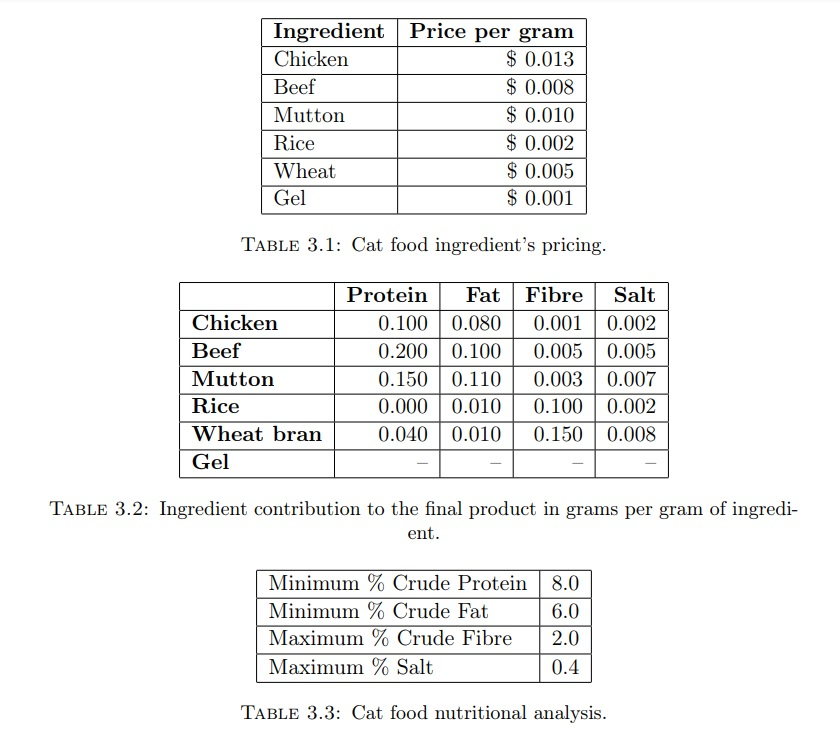

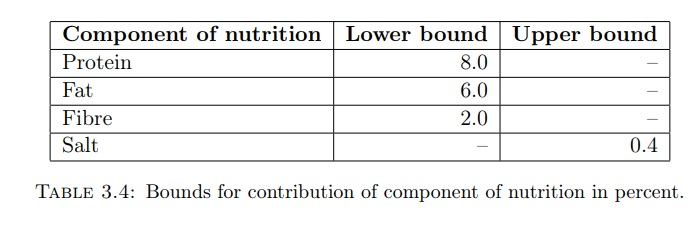

#### To produce their cat food products as cheaply as possible
#### To vary the quantities of each ingredient used (the main ingredients being chicken, beef, mutton, rice, wheat and gel) 
#### while still meeting their nutritional standards.    

The costs of the chicken, beef, and mutton are $0.013, $0.008 and $0.010 respectively, while the costs of the rice, wheat and gel are $0.002, $0.005 and $0.001 respectively.

### Identify the Decision Variables

    x1 = percentage of chicken meat in a can of cat food
    x2 = percentage of beef used in a can of cat food
    x3 = percentage of mutton used in a can of cat food
    x4 = percentage of rice used in a can of cat food
    x5 = percentage of wheat bran used in a can of cat food
    x6 = percentage of gel used in a can of cat food

Note that these percentages must be between 0 and 100.

### Formulate the Objective Function

The objective function becomes:
 min $0.013 x1 + $0.008 x2+ $0.010 x3 + $0.002 x4 + $0.005 x5 + $0.001 x6

### The Constraints
To meet the nutritional analysis requirements, we need to have at least 8g of Protein per 100g, 6g of fat, but no more than 2g of fibre and 0.4g of salt.

    x1 + x2 + x3 + x4 + x5 + x6 = 100
    0.100 x1 + 0.200 x2 + 0.150 x3 + 0.000 x4 + 0.040 x5 + 0.0 x6 >=8.0
    0.080 x1 + 0.100 x2 + 0.110 x3 + 0.010 x4 + 0.010 x5 + 0.0 x6 >=6.0
    0.001 x1 + 0.005 x2 + 0.003 x3 + 0.100 x4 + 0.150 x5 + 0.0 x6 >=2.0
    0.002 x1 + 0.005 x2 + 0.007 x3 + 0.002 x4 + 0.008 x5 + 0.0 x6 <=0.4

### Using PuLP library

In [2]:
# Import PuLP modeler functions
from pulp import *    # pip install Pulp

#import pulp as pl

In [9]:
# Creates a list of the Ingredients
Ingredients = ['CHICKEN', 'BEEF', 'MUTTON', 'RICE', 'WHEAT', 'GEL']

# A dictionary of the costs of each of the Ingredients is created
costs = {'CHICKEN': 0.013, 
         'BEEF': 0.008, 
         'MUTTON': 0.010, 
         'RICE': 0.002, 
         'WHEAT': 0.005, 
         'GEL': 0.001}

# A dictionary of the protein percent in each of the Ingredients is created
proteinPercent = {'CHICKEN': 0.100, 
                  'BEEF': 0.200, 
                  'MUTTON': 0.150, 
                  'RICE': 0.000, 
                  'WHEAT': 0.040, 
                  'GEL': 0.000}

# A dictionary of the fat percent in each of the Ingredients is created
fatPercent = {'CHICKEN': 0.080, 
              'BEEF': 0.100, 
              'MUTTON': 0.110, 
              'RICE': 0.010, 
              'WHEAT': 0.010, 
              'GEL': 0.000}

# A dictionary of the fibre percent in each of the Ingredients is created
fibrePercent = {'CHICKEN': 0.001, 
                'BEEF': 0.005, 
                'MUTTON': 0.003, 
                'RICE': 0.100, 
                'WHEAT': 0.150, 
                'GEL': 0.000}

# A dictionary of the salt percent in each of the Ingredients is created
saltPercent = {'CHICKEN': 0.002, 
               'BEEF': 0.005, 
               'MUTTON': 0.007, 
               'RICE': 0.002, 
               'WHEAT': 0.008, 
               'GEL': 0.000}

In [10]:
# Create the 'prob' variable to contain the problem data
prob = LpProblem("Cost_minimising_blending_problem", LpMinimize)

In [11]:
# A dictionary called 'ingredient_vars' is created to contain the referenced Variables
ingredient_vars = LpVariable.dicts("Ingr",Ingredients,0)

In [12]:
# The objective function is added to 'prob' first
prob += lpSum([costs[i]*ingredient_vars[i] for i in Ingredients]), "Total Cost of Ingredients per can"

In [13]:
# The five constraints are added to 'prob'
prob += lpSum([ingredient_vars[i] for i in Ingredients]) == 100, "PercentagesSum"
prob += lpSum([proteinPercent[i] * ingredient_vars[i] for i in Ingredients]) >= 8.0, "ProteinRequirement"
prob += lpSum([fatPercent[i] * ingredient_vars[i] for i in Ingredients]) >= 6.0, "FatRequirement"
prob += lpSum([fibrePercent[i] * ingredient_vars[i] for i in Ingredients]) >= 2.0, "FibreRequirement"
prob += lpSum([saltPercent[i] * ingredient_vars[i] for i in Ingredients]) <= 0.4, "SaltRequirement"

In [14]:
# The problem data is written to an .lp file
prob.writeLP("WhiskasModel.lp")

[Ingr_BEEF, Ingr_CHICKEN, Ingr_GEL, Ingr_MUTTON, Ingr_RICE, Ingr_WHEAT]

In [15]:
# The problem is solved using PuLP's choice of Solver
prob.solve()

1

In [16]:
# The status of the solution is printed to the screen
# which can be one of “Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”.
print("Status:", LpStatus[prob.status])

Status: Optimal


In [18]:
# Check status
if prob.status==1:
    print("Found a solution.\n")
else:
    print("Failed tofind solution: %s" %LpStatus[prob.status])
    sys.exit(1)

Found a solution.



In [47]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

Ingr_BEEF = 58.291457
Ingr_CHICKEN = 0.0
Ingr_GEL = 24.623116
Ingr_MUTTON = 0.0
Ingr_RICE = 17.085427
Ingr_WHEAT = 0.0


In [48]:
# The optimised objective function value is printed to the screen
print ("Total Cost of Ingredients per can = ", value(prob.objective))

Total Cost of Ingredients per can =  0.525125626


#### The optimal solution is 60% Beef and 40% Gel leading to a objective Function value of 52 cents per can.

## Using SciPy library

In [49]:
# Using the SciPy optimization and root-finding library for linear programming.
# Import required libraries
import numpy as np
from scipy.optimize import linprog  # conda install -c conda-forge glpk

In [50]:
# Set the inequality constraints matrix
# Note: the inequality constraints must be in the form of <=
#      so, put negative value for inequality >=
A = np.array([[-1,-1,-1,-1,-1,-1],
              [-0.1, -0.2, -0.15, 0, -0.04, 0], 
              [-0.08,-0.1,-0.11,-0.01,-0.01, 0], 
              [-0.001,-0.005,-0.003,-0.1,-0.15,0], 
              [0.002,0.005,0.007,0.002,0.008,0]
             ])

# Set the inequality constraints vector
b = np.array([-100,-8.0, -6.0, -2.0, 0.4])

# Set the coefficients of the linear objective function vector
c = np.array([0.013, 0.008, 0.010,0.002,0.005,0.001]) 

In [51]:
# Solve linear programming problem
res = linprog(c, A_ub=A, b_ub=b)

In [52]:
# Print results
print('Optimal value:', round(res.fun, ndigits=2),      # MAXIMIZATION PROBLEM :  round(res.fun*-1, ndigits=2)
      '\nx values:', res.x,
      '\nNumber of iterations performed:', res.nit,
'\nStatus:', res.message)

Optimal value: 0.53 
x values: [7.12544992e-07 5.82914565e+01 3.26581681e-07 1.70854265e+01
 6.35575300e-07 2.46231239e+01] 
Number of iterations performed: 8 
Status: Optimization terminated successfully.


## Blending Problem 2

In [1]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image(url ='https://i.stack.imgur.com/AFS30.jpg', width=800, height=800)

fron https://stackoverflow.com/questions/59579342/translating-a-lp-from-excel-to-python-pulp

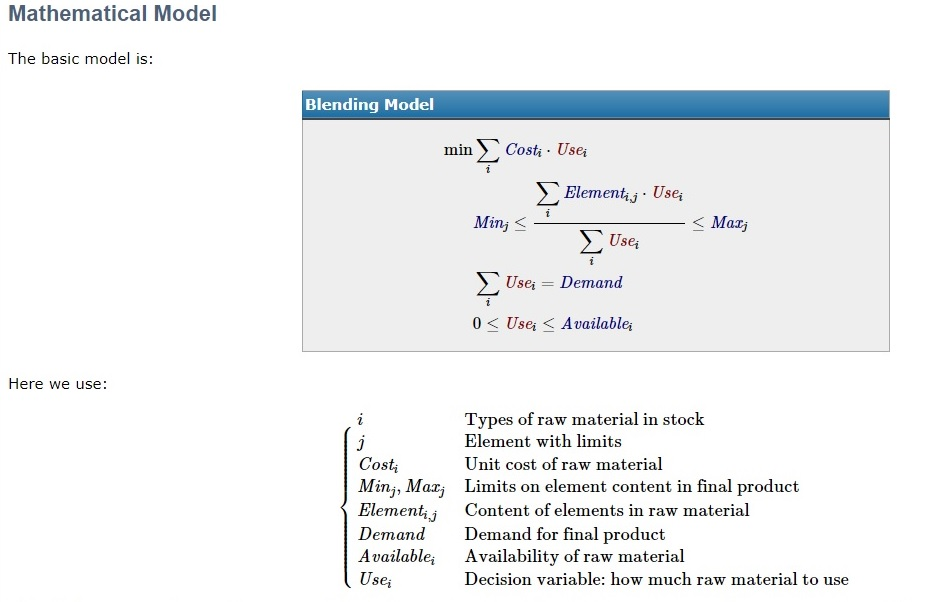

fron http://yetanothermathprogrammingconsultant.blogspot.com/2020/01/small-blending-problem-in-pulp.html

In [3]:
# Problem Data
input_mats = ["iron_1", "iron_2", "iron_3",
              "cu_1", "cu_2",
              "al_1", "al_2"]

input_costs = {"iron_1": 1.20, "iron_2": 1.50, "iron_3": 0.90,
               "cu_1":   1.30, "cu_2": 1.45,
               "al_1":   1.20, "al_2":   1.00}

#                               C%     Cu%   Mn%
input_composition = {"iron_1": [0.025, 0.000,  0.013],
                     "iron_2": [0.030, 0.000,  0.008],
                     "iron_3": [0.000, 0.003,  0.000],
                     "cu_1":   [0.000, 0.900,  0.000],
                     "cu_2":   [0.000, 0.960,  0.040],
                     "al_1":   [0.000, 0.004,  0.012],
                     "al_2":   [0.000, 0.006,  0.000]}

input_stock = {"iron_1": 4000, "iron_2": 3000, "iron_3": 6000,
               "cu_1": 5000, "cu_2":  2000,
               "al_1": 3000, "al_2": 2500}

request_quantity = 5000

Carbon_min = 0.02
Carbon_max = 0.03

Cu_min = 0.004
Cu_max = 0.006

Mn_min = 0.012
Mn_max = 0.0165

In [4]:
# Create the problem variable
steel = LpProblem ("Cost_minimising_blending_problem2", LpMinimize)
# Problem variables - amount in kg of each input
x = LpVariable.dicts("input_mat", input_mats, 0)

# The objective function is to minimize the total cost of the alloys in EUROS for a given quantity in KGS
steel += lpSum([input_costs[i]*x[i] for i in input_mats]), "AlliageCost"

# Quantity constraint in KGS.
steel += lpSum([x[i] for i in input_mats]) == request_quantity, "RequestedQuantity"

# MIN/MAX constraint of carbon in resultant steel
steel += lpSum([x[i]*input_composition[i][0] for i in input_mats]) >= Carbon_min*request_quantity, "MinCarbon"
steel += lpSum([x[i]*input_composition[i][0] for i in input_mats]) <= Carbon_max*request_quantity, "MaxCarbon"

# MIN/MAX constraints of copper in resultant steel
steel += lpSum([x[i]*input_composition[i][1] for i in input_mats]) >= Cu_min*request_quantity, "MinCu"
steel += lpSum([x[i]*input_composition[i][1] for i in input_mats]) <= Cu_max*request_quantity, "MaxCu"

# MIN/MAX constraints of manganese in resultant steel
steel += lpSum([x[i]*input_composition[i][2] for i in input_mats]) >= Mn_min*request_quantity, "MinMn"
steel += lpSum([x[i]*input_composition[i][2] for i in input_mats]) <= Mn_max*request_quantity, "MaxMn"


# MAX constraints of available stock
for i in input_mats:
    steel += x[i] <= input_stock[i], ("MaxStock_" + i)

# Solve the problem
steel.solve()

1

In [6]:
print("----- Model Results-------")
print("Status:", LpStatus[steel.status])
print("Objective:",value(steel.objective))

----- Model Results-------
Status: Optimal
Objective: 5887.57427835


In [13]:
# Display material compositions
Carbon_value = sum([x[i].varValue*input_composition[i][0] for i in input_mats])/request_quantity
Cu_value = sum([x[i].varValue*input_composition[i][1] for i in input_mats])/request_quantity
Mn_value = sum([x[i].varValue*input_composition[i][2] for i in input_mats])/request_quantity


print ("Carbon content: {:.2f}%".format(Carbon_value*100))
print ("Copper content: {:.2f}%".format(Cu_value*100))
print ("Manganese content: {:.2f}%".format(Mn_value*100))

Carbon content: 2.00%
Copper content: 0.60%
Manganese content: 1.20%


In [7]:
# Each of the variables is printed with it's resolved optimum value
for v in steel.variables():
    print(v.name, "=", v.varValue)

input_mat_al_1 = 574.62426
input_mat_al_2 = 0.0
input_mat_cu_1 = 0.0
input_mat_cu_2 = 27.612723
input_mat_iron_1 = 4000.0
input_mat_iron_2 = 0.0
input_mat_iron_3 = 397.76302


### Diet Problem

https://towardsdatascience.com/linear-programming-and-discrete-optimization-with-python-using-pulp-449f3c5f6e99

## Resourcing Problem 

http://benalexkeen.com/linear-programming-with-python-and-pulp-part-3/

We’re consulting for a boutique car manufacturer, producing luxury cars.

They run on one month (30 days) cycles, we have one cycle to show we can provide value.

There is one robot, 2 engineers and one detailer in the factory. The detailer has some holiday off, so only has 21 days available.

The 2 cars need different time with each resource:

Robot time: Car A – 3 days; Car B – 4 days.

Engineer time: Car A – 5 days; Car B – 6 days.

Detailer time: Car A – 1.5 days; Car B – 3 days.

Car A provides €30,000 profit, whilst Car B offers €45,000 profit.

At the moment, they produce 4 of each cars per month, for €300,000 profit. Not bad at all, but we think we can do better for them.

In [66]:
# Instantiate our problem class
model = LpProblem("Profit_maximising_problem", LpMaximize)

In [67]:
A = LpVariable('Car_A', lowBound=0, cat='Integer')    # For car A
B = LpVariable('Car_B', lowBound=0, cat='Integer')    # For Car B

In [68]:
# Objective function
model += 30000 * A + 45000 * B, "Profit"

# Constraints
model += 3 * A + 4 * B <= 30 ,"Robot30daysOneCycle"
model += 5 * A + 6 * B <= 60 ,"Engineer60daysTwoCycle"
model += 1.5 * A + 3 * B <= 21,"Dealer21daysOneCycle"

In [69]:
# The problem is solved using PuLP's choice of Solver
model.solve()

1

In [70]:
# The status of the solution is printed to the screen
# which can be one of “Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”.
print("Status:", LpStatus[model.status])

Status: Optimal


In [71]:
# Each of the variables is printed with it's resolved optimum value
for v in model.variables():
    print(v.name, "=", v.varValue)

Car_A = 2.0
Car_B = 6.0


In [72]:
# The optimised objective function value is printed to the screen
print ("Total maximum monthly profit = ", value(model.objective))

Total maximum monthly profit =  330000.0


So that’s €330,000 monthly profit, compared to their original monthly profit of €300,000

By producing 2 cars of Car A and 6 cars of Car B, we bolster the profits at the factory by €30,000 per month.

## The Resource Allocation Problem

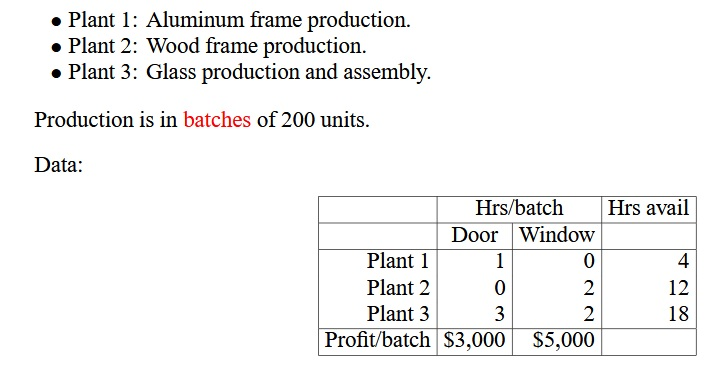
from :https://vanderbei.princeton.edu/542/lectures/lec1a.pdf

In [78]:
model2 = LpProblem("Profit_maximising_problem", LpMaximize)
Door = LpVariable('Door', lowBound=0, cat='Integer')    
Window = LpVariable('Window', lowBound=0, cat='Integer')   
# Objective function
model2 += 3000 * Door + 5000 * Window, "Profit"

# Constraints                   
model2 += 1 * Door + 0 * Window <= 4 ,"Plant_1"
model2 += 0 * Door + 2 * Window <= 12 ,"Plant_2"
model2 += 3 * Door + 2 * Window <= 18,"Plant_3"
model2 +=  Door +  Window <= 200,"TotalProduction"
# The problem is solved using PuLP's choice of Solver
model2.solve()

1

In [79]:
print("Status:", LpStatus[model2.status])

Status: Optimal


In [80]:
for v in model2.variables():
    print(v.name, "=", v.varValue)

Door = 2.0
Window = 6.0


In [81]:
print ("Total maximum monthly profit = ", value(model2.objective))

Total maximum monthly profit =  36000.0


### Capacitated Facility Location problem

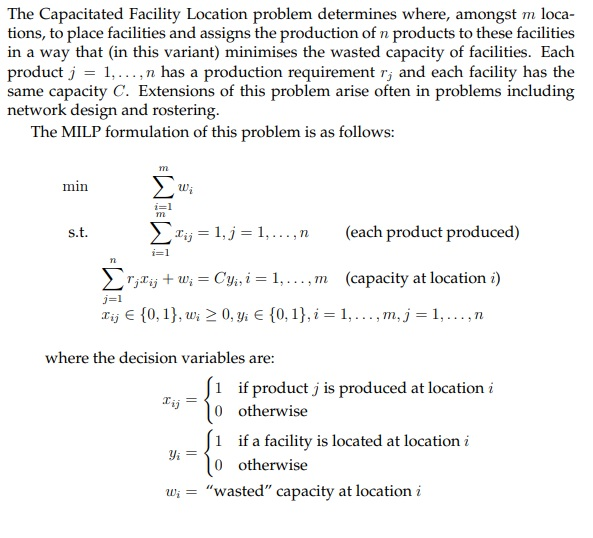

from http://www.optimization-online.org/DB_FILE/2011/09/3178.pdf

In [54]:
# Create data
locations = [1,2,3,4,5] # m locations
products = [1,2,3,4,5]   # j products
capacity = 8            #  each facility has the same capacity C
require = {1:7,2:5,3:3,4:2,5:2}  #  production requirement r

# Instantiate our problem class
# minimises the wasted capacity of facilities
prob = LpProblem("FacilityLocation", LpMinimize)

# set variables
use_vars = LpVariable.dicts("UseLocation", locations, 0, 1, LpBinary)
waste_vars = LpVariable.dicts("Waste", locations, 0, capacity)

# create an entry in the list of the form (i,j) for every combination of location and product
assign_vars = LpVariable.dicts("AtLocation",[(i, j) for i in locations for j in products],0, 1, LpBinary)

# Objective function
# The objective is simply the sum of the waste variables
prob += lpSum(waste_vars[i] for i in locations)

# set constraints
for j in products:
    prob += lpSum(assign_vars[(i, j)] for i in locations) == 1
    
for i in locations:
    prob += lpSum(assign_vars[(i, j)] * require[j] for j in products)  + waste_vars[i] == capacity * use_vars[i]



In [55]:
# use the default solver
prob.solve()
print("Status:", LpStatus[prob.status])
print ("The wasted capacity of facilities = ", value(prob.objective))
TOL = 0.00001
for i in locations:
    if use_vars[i].varValue > TOL:
        print ("Location ", i, " produces ", [j for j in products if assign_vars[(i, j)].varValue > TOL] )

Status: Optimal
The wasted capacity of facilities =  5.0
Location  1  produces  [2, 5]
Location  2  produces  [3, 4]
Location  5  produces  [1]


## Scheduling Problem

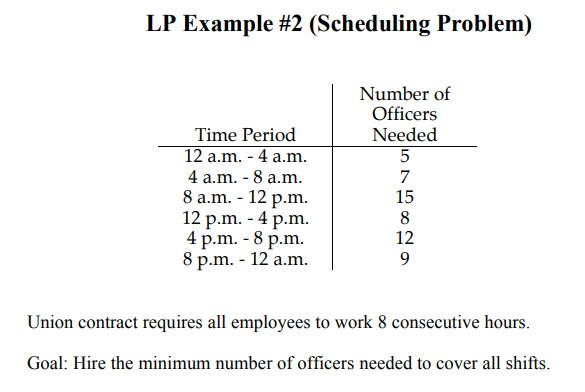
from http://faculty.washington.edu/mhillier/ba502/Formulation.pdf

Define Six 8-hours shifts: with 4-hour time windows as rows, 8-hour shifts as columns 
   Shift_1 - 12am-8am
   Shift_2 - 4am-12pm
   Shift_3 - 8am-4pm
   Shift_4 - 12pm-8pm
   Shift_5 - 4pm-12am
   Shift_6 - 8pm-4am

In [107]:
schedule = LpProblem("Schedule_problem", LpMinimize)
shift_1 = LpVariable('shift_1', lowBound=0, cat='Integer')    
shift_2 = LpVariable('shift_2', lowBound=0, cat='Integer') 
shift_3 = LpVariable('shift_3', lowBound=0, cat='Integer') 
shift_4 = LpVariable('shift_4', lowBound=0, cat='Integer') 
shift_5 = LpVariable('shift_5', lowBound=0, cat='Integer') 
shift_6 = LpVariable('shift_6', lowBound=0, cat='Integer') 

# Objective function
schedule +=  shift_1 +  shift_2 + shift_3 + shift_4 +  shift_5 + shift_6, "Total_Officers"

# Constraints                   
schedule += 1 * shift_1 + 0 * shift_2 + 0 * shift_3 + 0 * shift_4 + 0 * shift_5 + 1 * shift_6 >= 5 ,"Period_1"
schedule += 1 * shift_1 + 1 * shift_2 + 0 * shift_3 + 0 * shift_4 + 0 * shift_5 + 0 * shift_6 >= 7 ,"Period_2"
schedule += 0 * shift_1 + 1 * shift_2 + 1 * shift_3 + 0 * shift_4 + 0 * shift_5 + 0 * shift_6 >= 15,"Period_3"
schedule += 0 * shift_1 + 0 * shift_2 + 1 * shift_3 + 1 * shift_4 + 0 * shift_5 + 0 * shift_6 >= 8 ,"Period_4"
schedule += 0 * shift_1 + 0 * shift_2 + 0 * shift_3 + 1 * shift_4 + 1 * shift_5 + 0 * shift_6 >= 12 ,"Period_5"
schedule += 0 * shift_1 + 0 * shift_2 + 0 * shift_3 + 0 * shift_4 + 1 * shift_5 + 1 * shift_6 >= 9 , "Period_6"
# The problem is solved using PuLP's choice of Solver
schedule.solve()

1

In [108]:
print("Status:", LpStatus[schedule.status])

Status: Optimal


In [109]:
for v in schedule.variables():
    print(v.name, "=", v.varValue)

shift_1 = 0.0
shift_2 = 15.0
shift_3 = 0.0
shift_4 = 8.0
shift_5 = 4.0
shift_6 = 5.0


In [110]:
print("Total number of officers = ", pulp.value(schedule.objective))

Total number of officers =  32.0


### Scheduling problem 2

http://benalexkeen.com/linear-programming-with-python-and-pulp-part-5/

### Set Covering

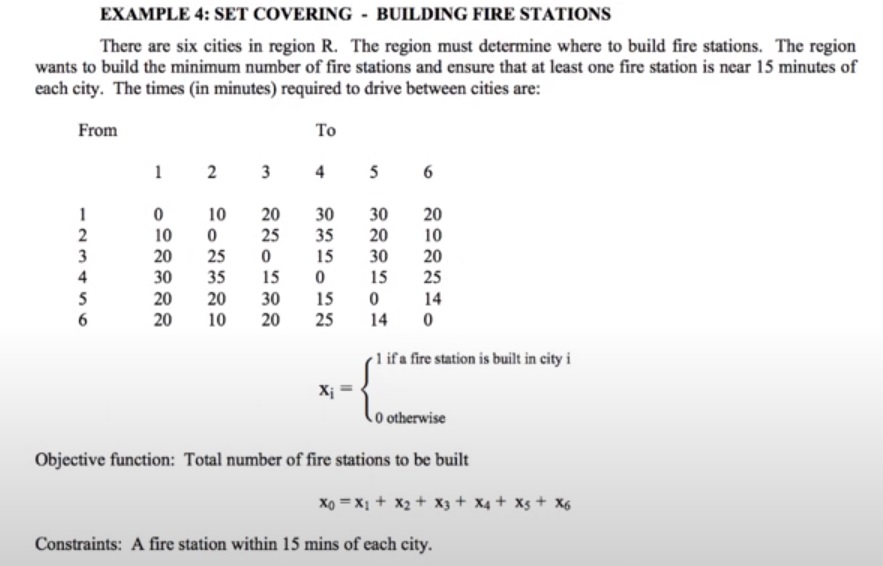

from https://www.youtube.com/watch?v=NfIKB07J914

In [42]:
import numpy as np
# Set parameter
dist = np.array([[0,10,20,30,30,20],
               [10,0,25,35,20,10],
               [20,25,0,15,30,20],
               [30,35,15,0,15,25],
               [20,20,30,15,0,14],
               [20,10,20,25,14,0]])
cities =[0,1,2,3,4,5]

# set problem variable
fire = LpProblem("FireStation",LpMinimize)

# Decision Variables
use_vars = LpVariable.dicts("BuildFiresStation",cities,0,1,LpBinary)

# Objective function
fire += lpSum(use_vars[i] for i in cities)

# Suject to:
for j in cities:
    fire += lpSum([ use_vars[i] for i in cities 
                   if dist[i][j] <=15 ] 
                 ) >= 1
fire.solve()

1

In [47]:
print("Status:", LpStatus[fire.status])
for i in cities:
    if use_vars[i].varValue > 0:
        print("Build firestation in location", i+1) 

Status: Optimal
Build firestation in location 2
Build firestation in location 4


## Transportation Problem

#### CASE 1: Supply = Demand

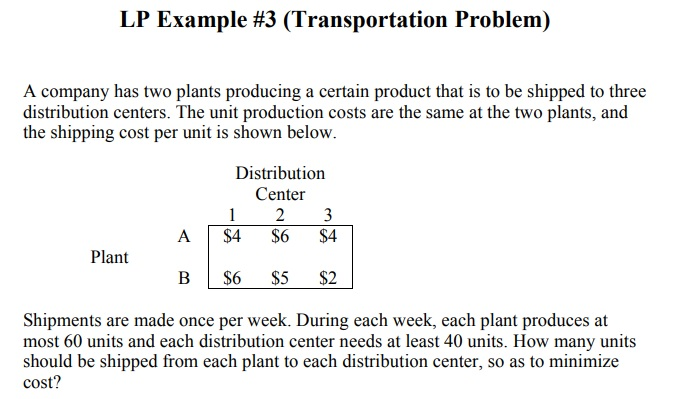
from http://faculty.washington.edu/mhillier/ba502/Formulation.pdf

In [115]:
# Total Supply units = 2*60 =120
# Total Demand units = 3*40 =120

# Creates the 'trans' variable to contain the problem data
trans = LpProblem("Transporation_problem", LpMinimize)


# Creates a list of all the supply nodes
plants = ["A", "B"]

# Creates a dictionary for the number of units of supply for each supply node
supply = {"A": 60,
          "B": 60}

# Creates a list of all demand nodes
centers = ["1", "2", "3"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {"1":40,
          "2":40,
          "3":40}

# Creates a list of costs of each transportation path
costs = [   #Bars
         #1 2 3
         [4,6,4],#A   Warehouses
         [6,5,2] #B
         ]

# The cost data is made into a dictionary
costs = makeDict([plants,centers],costs,0)

# Creates a list of tuples containing all the possible routes for transport
Routes = [(w,b) for w in plants for b in centers]

# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route",(plants,centers),0,None,LpInteger)

# The objective function is added to 'prob' first
trans += lpSum([vars[w][b]*costs[w][b] for (w,b) in Routes]), "Sum_of_Transporting_Costs"

# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in plants:
    trans += lpSum([vars[w][b] for b in centers])<=supply[w], "Sum_of_Products_out_of_plants_%s"%w

# The demand minimum constraints are added to prob for each demand node (bar)
for b in centers:
    trans += lpSum([vars[w][b] for w in plants])>=demand[b], "Sum_of_Products_into_centers%s"%b



# The problem is solved using PuLP's choice of Solver
trans.solve()

1

In [117]:
print("Status:", LpStatus[trans.status])
for v in trans.variables():
    print(v.name, "=", v.varValue)
print("Minimize Cost = ", pulp.value(trans.objective))

Status: Optimal
Route_A_1 = 40.0
Route_A_2 = 20.0
Route_A_3 = 0.0
Route_B_1 = 0.0
Route_B_2 = 20.0
Route_B_3 = 40.0
Minimize Cost =  460.0


#### CASE 2: Supply < Demand

In [120]:
# Total Supply units = 40 + 60 =100
# Total Demand units = 3*40 =120

# Creates the 'trans' variable to contain the problem data
trans2 = LpProblem("Transporation_problem", LpMinimize)


# Creates a list of all the supply nodes
plants = ["A", "B", "C"]  # dummy supply node C

# Creates a dictionary for the number of units of supply for each supply node
supply = {"A": 40,
          "B": 60,
          "C": 20}

# Creates a list of all demand nodes
centers = ["1", "2", "3"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {"1":40,
          "2":40,
          "3":40}

# Creates a list of costs of each transportation path
costs = [   #Bars
         #1 2 3
         [4,6,4] ,# plant A
         [6,5,2], # plant B
         [0,0,0]] # dummy supply node 

# The cost data is made into a dictionary
costs = makeDict([plants,centers],costs,0)

# Creates a list of tuples containing all the possible routes for transport
Routes = [(w,b) for w in plants for b in centers]

# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route",(plants,centers),0,None,LpInteger)

# The objective function is added to 'prob' first
trans2 += lpSum([vars[w][b]*costs[w][b] for (w,b) in Routes]), "Sum_of_Transporting_Costs"

# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in plants:
    trans2 += lpSum([vars[w][b] for b in centers])<=supply[w], "Sum_of_Products_out_of_plants_%s"%w

# The demand minimum constraints are added to prob for each demand node (bar)
for b in centers:
    trans2 += lpSum([vars[w][b] for w in plants])>=demand[b], "Sum_of_Products_into_centers%s"%b



# The problem is solved using PuLP's choice of Solver
trans2.solve()

1

In [121]:
print("Status:", LpStatus[trans2.status])
for v in trans2.variables():
    print(v.name, "=", v.varValue)
print("Minimize Cost = ", pulp.value(trans2.objective))

Status: Optimal
Route_A_1 = 40.0
Route_A_2 = 0.0
Route_A_3 = 0.0
Route_B_1 = 0.0
Route_B_2 = 20.0
Route_B_3 = 40.0
Route_C_1 = 0.0
Route_C_2 = 20.0
Route_C_3 = 0.0
Minimize Cost =  340.0


### TRANSPORTATION PROBLEM 2

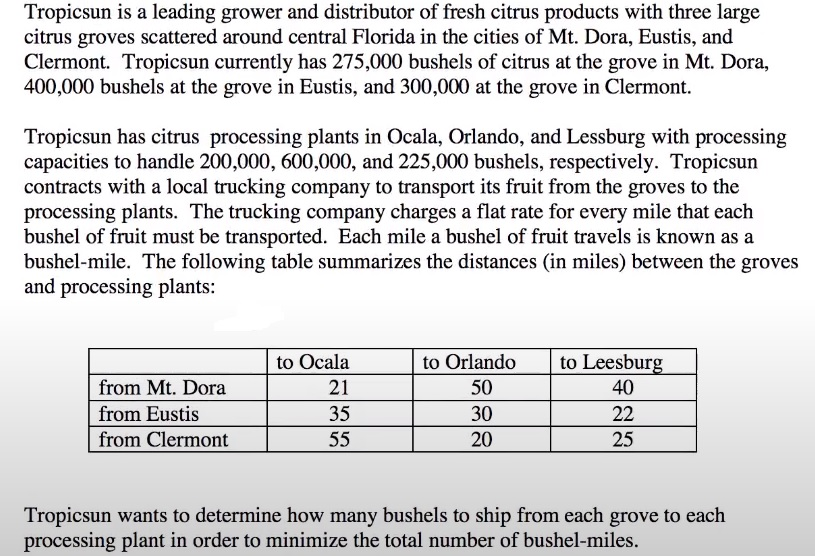
from https://www.youtube.com/watch?v=Jr7LI-sUEmo

In [29]:
# Create data /variables
plants = ['Ocala','Orlando','Leesburg']
groves = ['Mt.Dora','Eustis','Clermont']

demand = {'Ocala':200000,
         'Orlando':600000,
         'Leesburg':225000}

supply = {'Mt.Dora':275000,
          'Eustis':400000,
          'Clermont':300000}

bushel = {'Mt.Dora':{'Ocala':21,'Orlando':50,'Leesburg':40},
          'Eustis':{'Ocala':35,'Orlando':30,'Leesburg':22},
          'Clermont':{'Ocala':55,'Orlando':20,'Leesburg':25}}

# Problem variable
routes =[(i,j) for i in groves for j in plants]
tropicsum = LpProblem("Transportation_problem", LpMinimize)

In [30]:
# Decision variable
amount_vars = LpVariable.dicts("ShipAmount",(groves,plants),0,None,LpInteger)

# Objective function
tropicsum += lpSum(amount_vars[i][j] * bushel[i][j] for (i,j) in routes)

# Constraints
for j in plants:
    tropicsum += lpSum(amount_vars[i][j] for i in groves) <= demand[j]
for i in groves:
    tropicsum += lpSum(amount_vars[i][j] for j in plants) == supply[i]    

# The problem is solved using PuLP's choice of Solver
tropicsum.solve()

1

In [31]:
print("Status:", LpStatus[tropicsum.status])
for v in tropicsum.variables():
    print(v.name, "=", v.varValue)
print("Total bushel-miles = ", value(tropicsum.objective))

Status: Optimal
ShipAmount_Clermont_Leesburg = 0.0
ShipAmount_Clermont_Ocala = 0.0
ShipAmount_Clermont_Orlando = 300000.0
ShipAmount_Eustis_Leesburg = 150000.0
ShipAmount_Eustis_Ocala = 0.0
ShipAmount_Eustis_Orlando = 250000.0
ShipAmount_Mt.Dora_Leesburg = 75000.0
ShipAmount_Mt.Dora_Ocala = 200000.0
ShipAmount_Mt.Dora_Orlando = 0.0
Total bushel-miles =  24000000.0


## Assignment Problem

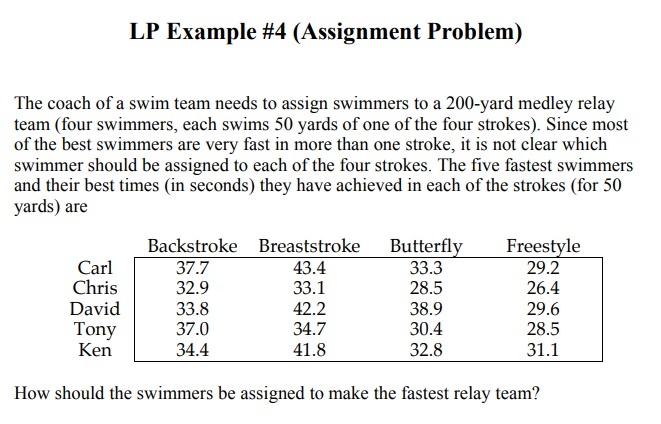
from http://faculty.washington.edu/mhillier/ba502/Formulation.pdf

In [125]:
# Creates the 'trans' variable to contain the problem data
assign = LpProblem("Assignment_problem", LpMinimize)


# Creates a list of all the supply nodes
swimmers = ["Carl", "Chris", "David","Tony","Ken"]  # dummy supply node C

# Creates a dictionary for the number of units of supply for each supply node
choice = {"Carl": 1,
          "Chris": 1,
          "David": 1,
          "Tony": 1 ,
          "Ken": 1}

# Creates a list of all demand nodes
strokes = ["Backstroke", "Breaststroke", "Butterfly","Freestyle"]

# Creates a dictionary for the number of units of demand for each demand node
team = {"Backstroke":1,
          "Breaststroke":1,
          "Butterfly": 1,
          "Freestyle":1}

# Creates a list of costs of each transportation path
times = [   #Bars
         #1    2    3    4
         [37.7,43.4,33.3,29.2] ,# plant A
         [32.9,33.1,28.5,26.4], # plant B
         [33.8,42.2,38.9,29.6],
         [37.0,34.7,30.4,28.5],
         [34.4,41.8,32.8,31.1]] 

# The cost data is made into a dictionary
costs = makeDict([swimmers,strokes],times,0)

# Creates a list of tuples containing all the possible routes for transport
Routes = [(w,b) for w in swimmers for b in strokes]

# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route",(swimmers,strokes),0,None,LpInteger)

# The objective function is added to 'prob' first
assign += lpSum([vars[w][b]*costs[w][b] for (w,b) in Routes]), "Sum_of_Transporting_Costs"

# The supply maximum constraints are added to prob for each supply node (warehouse)
for w in swimmers:
    assign += lpSum([vars[w][b] for b in strokes])<=choice[w], "Sum_of_Products_out_of_plants_%s"%w

# The demand minimum constraints are added to prob for each demand node (bar)
for b in strokes:
    assign += lpSum([vars[w][b] for w in swimmers])>=team[b], "Sum_of_Products_into_centers%s"%b



# The problem is solved using PuLP's choice of Solver
assign.solve()

1

In [126]:
print("Status:", LpStatus[assign.status])
for v in assign.variables():
    print(v.name, "=", v.varValue)
print("Minimize Cost = ", value(assign.objective))

Status: Optimal
Route_Carl_Backstroke = 0.0
Route_Carl_Breaststroke = 0.0
Route_Carl_Butterfly = 0.0
Route_Carl_Freestyle = 1.0
Route_Chris_Backstroke = 0.0
Route_Chris_Breaststroke = 0.0
Route_Chris_Butterfly = 1.0
Route_Chris_Freestyle = 0.0
Route_David_Backstroke = 1.0
Route_David_Breaststroke = 0.0
Route_David_Butterfly = 0.0
Route_David_Freestyle = 0.0
Route_Ken_Backstroke = 0.0
Route_Ken_Breaststroke = 0.0
Route_Ken_Butterfly = 0.0
Route_Ken_Freestyle = 0.0
Route_Tony_Backstroke = 0.0
Route_Tony_Breaststroke = 1.0
Route_Tony_Butterfly = 0.0
Route_Tony_Freestyle = 0.0
Minimize Cost =  126.2


## Cash Flow Problem

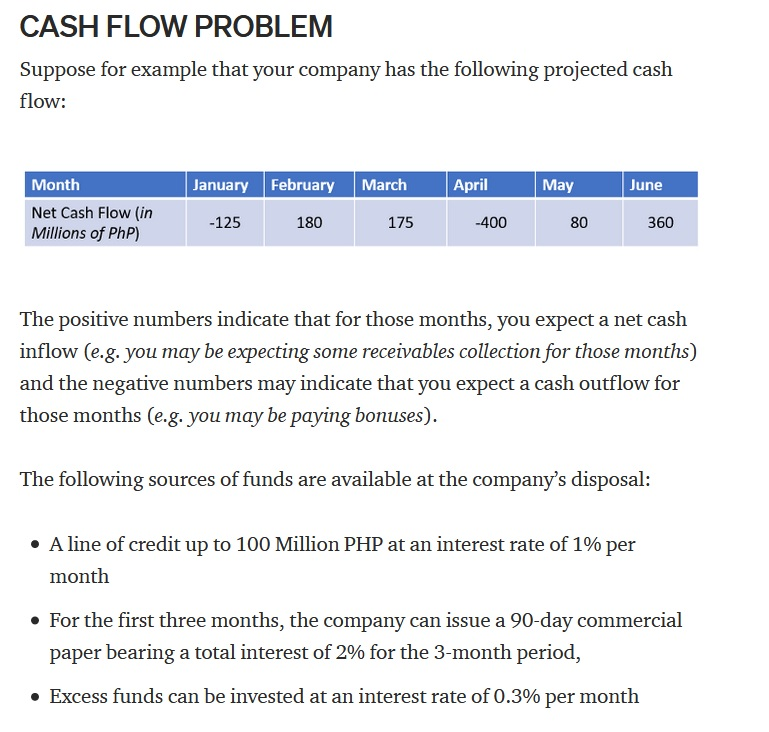
from https://medium.com/swlh/optimize-your-companys-cash-flow-with-scipy-e0b034a1d0db

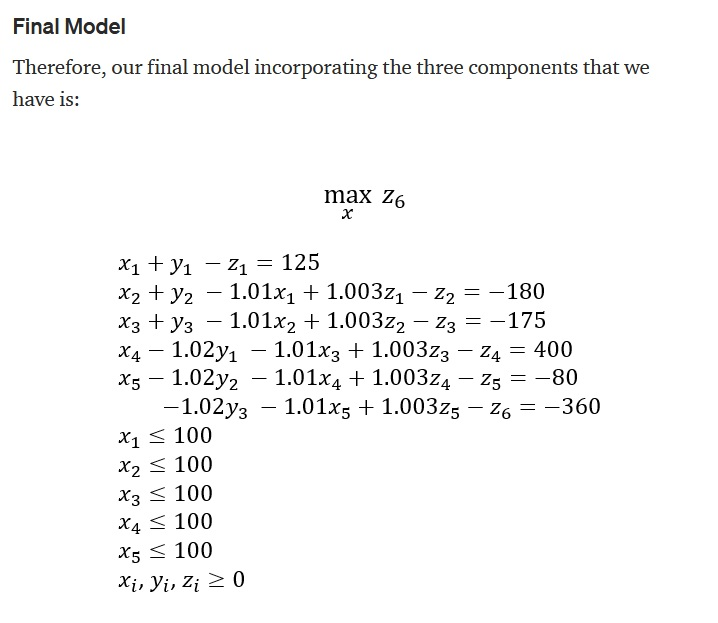

In [48]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image(url ='https://miro.medium.com/max/700/1*uR7ZK65ci0NHEKHWSLUu_w.png', width=700, height=900)

In [30]:
cf = LpProblem("Cash_Flow_problem",  LpMaximize)
x_1 = LpVariable('x_1', lowBound=0, cat='Continuous')    
x_2 = LpVariable('x_2', lowBound=0, cat='Continuous') 
x_3 = LpVariable('x_3', lowBound=0, cat='Continuous') 
x_4 = LpVariable('x_4', lowBound=0, cat='Continuous') 
x_5 = LpVariable('x_5', lowBound=0, cat='Continuous') 
y_1 = LpVariable('y_1', lowBound=0, cat='Continuous')    
y_2 = LpVariable('y_2', lowBound=0, cat='Continuous') 
y_3 = LpVariable('y_3', lowBound=0, cat='Continuous')
z_1 = LpVariable('z_1', lowBound=0, cat='Continuous')    
z_2 = LpVariable('z_2', lowBound=0, cat='Continuous') 
z_3 = LpVariable('z_3', lowBound=0, cat='Continuous') 
z_4 = LpVariable('z_4', lowBound=0, cat='Continuous') 
z_5 = LpVariable('z_5', lowBound=0, cat='Continuous') 
z_6 = LpVariable('z_6', lowBound=0, cat='Continuous')

# Objective function
cf += z_6  # z_1 +  z_2 + z_3 + z_4 +  z_5 + z_6, "Total_Funds"

# Constraints                   
cf += x_1 +  y_1 - z_1  == 125  
cf += x_2 +  y_2 - 1.01 * x_1 + 1.003 * z_1 - z_2 == -180
cf += x_3 +  y_3 - 1.01 * x_2 + 1.003 * z_2 - z_3 == -175
cf += x_4 - 1.02 * y_1 - 1.01 * x_3 + 1.003 * z_3 - z_4 == 400
cf += x_5 - 1.02 * y_2 - 1.01 * x_4 + 1.003 * z_4 - z_5 == -80
cf += - 1.02 * y_3 - 1.01 * x_5 +  1.003 * z_5 - z_6 == -360

cf += x_1 <= 100
cf += x_2 <= 100
cf += x_3 <= 100
cf += x_4 <= 100
cf += x_5 <= 100

# The problem is solved using PuLP's choice of Solver
cf.solve()

1

In [31]:
print("Status:", LpStatus[cf.status])

Status: Optimal


In [32]:
for v in cf.variables():
    print(v.name, "=", v.varValue)

x_1 = 100.0
x_2 = 0.0
x_3 = 0.0
x_4 = 79.207921
x_5 = 0.0
y_1 = 25.0
y_2 = 0.0
y_3 = 91.01931
z_1 = 0.0
z_2 = 79.0
z_3 = 345.25631
z_4 = 0.0
z_5 = 0.0
z_6 = 267.1603


In [34]:
# The optimised objective function value is printed to the screen
print ("Total Funds at month 6 = ", value(cf.objective))

Total Funds at month 6 =  267.1603


Thus, we need to fully utilize our line of credit on month 1 (x_1) and issue short-term commercial paper of PhP 25 Million. This meets the obligation on month 1 or January. And so on and so forth.
At the end of Month 6 (z_6), successfully implementing this would maximize final wealth to Php 267 Million.

### SCIPY CODES 
https://github.com/francisadrianviernes/Financial-Analytics/blob/master/Financial%20Analytics/Financial%20Optimization/Cash%20Flow%20Allocation%20Problem.ipynb

### Capital Budgeting
https://www.annytab.com/integer-programming-in-python/

In [37]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image(url ='https://www.annytab.com/wp-content/uploads/2020/03/integer-programming.png', width=800, height=800)

In [42]:
# Either LpMinimize (default) or LpMaximize
budget = LpProblem('Capital-Budgeting', LpMaximize)
# Projects
projects = ['1', '2', '3', '4']
# Return on investments (MSEK)
roi = {'1':2, '2':3, '3':5, '4':1}
# Capital requirments (MSEK)
y2020 = {'1':5, '2':10, '3':15, '4':1}
y2021 = {'1':3, '2':8, '3':15, '4':4}
y2022 = {'1':2, '2':2, '3':3, '4':1}
# Create decision variables (values that can be modified by solver)
# Category: Integer, Binary or Continuous(default)
decision = LpVariable.dicts('Project', projects, lowBound=None, upBound=None, cat='Binary')
# Objective function
budget += lpSum([roi[i] * decision[i] for i in projects])
# Constraints
budget += lpSum([y2020[i] * decision[i] for i in projects]) <= 31 
budget += lpSum([y2021[i] * decision[i] for i in projects]) <= 25
budget += lpSum([y2022[i] * decision[i] for i in projects]) <= 4

In [46]:
# Print problem
print(budget)
# Write problem data to an .lp file
budget.writeLP('capital_budgeting.lp')
# Solve the problem by using PuLP's choice of Solver
budget.solve()

Capital-Budgeting:
MAXIMIZE
2*Project_1 + 3*Project_2 + 5*Project_3 + 1*Project_4 + 0
SUBJECT TO
_C1: 5 Project_1 + 10 Project_2 + 15 Project_3 + Project_4 <= 31

_C2: 3 Project_1 + 8 Project_2 + 15 Project_3 + 4 Project_4 <= 25

_C3: 2 Project_1 + 2 Project_2 + 3 Project_3 + Project_4 <= 4

VARIABLES
0 <= Project_1 <= 1 Integer
0 <= Project_2 <= 1 Integer
0 <= Project_3 <= 1 Integer
0 <= Project_4 <= 1 Integer



1

In [47]:
# Print the status of the solution
print('Status: {0}\n'.format(LpStatus[budget.status]))
# Print each variable with optimal value
print('Decisions')
for v in budget.variables():
    print(v.name, "=", v.varValue)
print()
# Print the optimal goal value
print('Total Return On Investments (MSEK) = {0}\n'.format(value(budget.objective)))

Status: Optimal

Decisions
Project_1 = 0.0
Project_2 = 0.0
Project_3 = 1.0
Project_4 = 1.0

Total Return On Investments (MSEK) = 6.0



The best solution is to go through with project 3 and 4, this gives a total return on investments of 6 MSEK.

## Project Budget

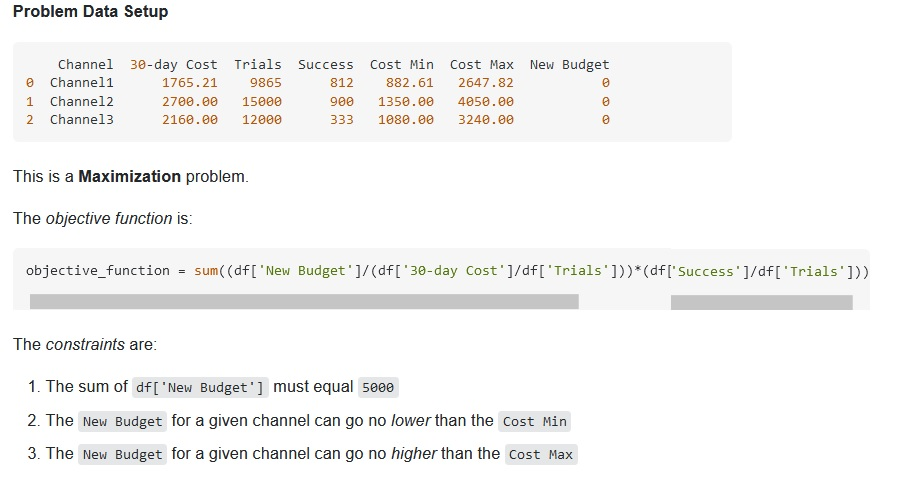

from https://stackoverflow.com/questions/33160262/linear-programming-simplex-lp-pulp

In [15]:
# Prepare data
import numpy as np
import pandas as pd
idx = [0, 1, 2]
d = {'channel': pd.Series(['Channel1', 'Channel2', 'Channel3'], index=idx),
     '30-day Cost': pd.Series([1765.21, 2700., 2160.], index=idx),
     'Trials': pd.Series([9865, 1500, 1200], index=idx),
     'Success': pd.Series([812, 900, 333], index=idx),
     'Cost Min': pd.Series([882.61, 1350.00, 1080.00], index=idx),
     'Cost Max': pd.Series([2647.82, 4050.00, 3240.00], index=idx)}
df = pd.DataFrame(d)

In [19]:
# Create variables and model
x = LpVariable.dicts("Channel", df.index, lowBound=0)
mod = LpProblem("Budget", LpMaximize)

# Objective function
objvals = {idx: (1.0/(df['30-day Cost'][idx]/df['Trials'][idx]))*(df['Success'][idx]/float(df['Trials'][idx])) for idx in df.index}
mod += sum([x[idx]*objvals[idx] for idx in df.index])

# Lower and upper bounds:
for idx in df.index:
    mod += x[idx] >= df['Cost Min'][idx]
    mod += x[idx] <= df['Cost Max'][idx]

# Budget sum
mod += sum([x[idx] for idx in df.index]) == 5000.0

# Solve model
mod.solve()

1

In [20]:
# Print the status of the solution
print('Status: {0}\n'.format(LpStatus[mod.status]))
# Print each variable with optimal value
print('Decisions')
for v in mod.variables():
    print(v.name, "=", v.varValue)
print()
# Print the optimal goal value
print('New budget = {0}\n'.format(value(mod.objective)))

Status: Optimal

Decisions
Channel_0 = 2570.0
Channel_1 = 1350.0
Channel_2 = 1080.0

New budget = 1798.7049501192491



### PORTFOLIO SELECTION (INVESTMENT DECISIONS) Problem

from https://old.mu.ac.in/wp-content/uploads/2017/10/dormsem1linearprogramming.pdf

An  investor  is  considering  investing  in  two  securities  'A'  and  'B'.  The risk  and  return associated with these securities is different. 
* Security 'A' gives a return of 9% and has a risk  factor of 5 on a scale of zero to 10. 
* Security 'B' gives return of 15% but has risk factor of 8.
* Total  amount  to  be  invested  is  Rs.  5, 00,000. 
* Total  minimum  returns  on  the  investment should be 12%.  Maximum combined risk should not be more than 6.

In [70]:
tr = LpProblem("PORTFOLIO_problem",  LpMaximize)
# set variables
A = LpVariable('Security A', lowBound=0, cat='Continuous')    
B = LpVariable('Security B', lowBound=0, cat='Continuous') 

# Objective function
tr += 0.09 * A + 0.15 * B, "Total_Returns"

# Constraints                   
tr += A + B  == 500000  # Total Investment
tr += 5 * A + 8 * B <=   6 * 500000  # Risk
tr += 0.09 * A + 0.15 * B >= 0.12 * 500000  # Returns

# The problem is solved using PuLP's choice of Solver
tr.solve()

-1

In [71]:
print("Status:", LpStatus[tr.status])

# The optimised objective function value is printed to the screen
print ("Total Returns = ", value(tr.objective))

for v in tr.variables():
    print(v.name, "=", v.varValue)

Status: Infeasible
Total Returns =  55000.0002
Security_A = 333333.33
Security_B = 166666.67
